In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_rows = 200

In [2]:
model_dir = '/oak/stanford/groups/akundaje/projects/neuro-variants/chrombpnet_models/ameen_2022/K562_bias'
outs_dir = '/oak/stanford/groups/akundaje/projects/neuro-variants/model_performance/ameen_2022'

In [3]:
cell_type_metrics_dict = {'celltype': [], 'fold': [],
                          'peaks_pearsonr': [], 'peaks_spearmanr': [], 'peaks_median_jsd': [],
                          'bias_correction_status': [], 'tn5_footprint_1': [], 'tn5_footprint_2': [], 'tn5_footprint_3': [],
                          'tn5_footprint_4': [], 'tn5_footprint_5': []
                          }

for cluster in os.listdir(model_dir):
    print(cluster)

    # for fold in [os.listdir(os.path.join(model_dir, cluster))]:
    for fold in ['fold_' + str(i) for i in range(5)]:
        metrics_json = os.path.join(model_dir, cluster, fold, 'evaluation', 'chrombpnet_metrics.json')
        footprints_txt = os.path.join(model_dir, cluster, fold, 'evaluation', 'chrombpnet_nobias_max_bias_response.txt')

        # if os.path.isfile(metrics_json) and os.path.isfile(footprints_txt):
        metrics = json.load(open(metrics_json))
        cell_type_metrics_dict['celltype'].append(cluster.split('.')[1])
        cell_type_metrics_dict['fold'].append(fold)
        cell_type_metrics_dict['peaks_pearsonr'].append(metrics['counts_metrics']['peaks']['pearsonr'])
        cell_type_metrics_dict['peaks_spearmanr'].append(metrics['counts_metrics']['peaks']['spearmanr'])
        cell_type_metrics_dict['peaks_median_jsd'].append(metrics['profile_metrics']['peaks']['median_jsd'])
        
        with open(footprints_txt, 'r') as footprints_file:
            lines = footprints_file.readlines()[0]
            status = lines.split('_')[0] # corrected or uncorrected
            val1 = [float(lines.split('_')[1])]
            val_rest = [float(i) for i in lines.split('_')[2].split('/')]

            cell_type_metrics_dict['bias_correction_status'].append(status)
            cell_type_metrics_dict['tn5_footprint_1'].append(val_rest[0])
            cell_type_metrics_dict['tn5_footprint_2'].append(val_rest[1])
            cell_type_metrics_dict['tn5_footprint_3'].append(val_rest[2])
            cell_type_metrics_dict['tn5_footprint_4'].append(val_rest[3])
            cell_type_metrics_dict['tn5_footprint_5'].append(val_rest[4])

        # else:
        #     print()
        #     print(metrics_json)
        #     print(footprints_txt)
        #     print()
                    
cell_type_metrics_df = pd.DataFrame(cell_type_metrics_dict)

ameen_2022.preSMC
ameen_2022.CFP
ameen_2022.vEC
ameen_2022.eCM
ameen_2022.Endo2
ameen_2022.CF
ameen_2022.Cap
ameen_2022.FB1
ameen_2022.NC
ameen_2022.Endo1
ameen_2022.EPC
ameen_2022.FB2
ameen_2022.PC
ameen_2022.aCM
ameen_2022.lEC
ameen_2022.vSMC
ameen_2022.preCF
ameen_2022.vCM
ameen_2022.aEC
ameen_2022.OFT


In [4]:
cell_type_metrics_df

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5
0,preSMC,fold_0,0.793893,0.768458,0.666644,corrected,0.001,0.001,0.001,0.001,0.001
1,preSMC,fold_1,0.782733,0.750086,0.673683,corrected,0.001,0.001,0.001,0.001,0.001
2,preSMC,fold_2,0.796323,0.778236,0.667041,corrected,0.001,0.001,0.001,0.001,0.001
3,preSMC,fold_3,0.794511,0.766355,0.671787,corrected,0.001,0.001,0.001,0.001,0.001
4,preSMC,fold_4,0.788295,0.778219,0.652626,corrected,0.001,0.001,0.001,0.001,0.001
5,CFP,fold_0,0.793972,0.761830,0.648178,corrected,0.001,0.001,0.001,0.001,0.001
6,CFP,fold_1,0.790985,0.745989,0.652060,corrected,0.001,0.001,0.001,0.001,0.001
7,CFP,fold_2,0.791588,0.759462,0.647338,corrected,0.001,0.001,0.001,0.001,0.001
8,CFP,fold_3,0.787691,0.743530,0.657244,corrected,0.001,0.001,0.001,0.002,0.001
9,CFP,fold_4,0.782049,0.764378,0.639193,corrected,0.001,0.001,0.001,0.001,0.001


In [5]:
cell_type_metrics_df.loc[cell_type_metrics_df['bias_correction_status'] != 'corrected']

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5


In [6]:
cell_type_metrics_df['tn5_footprint_1'].max()

0.001

In [7]:
cell_type_metrics_df['tn5_footprint_2'].max()

0.002

In [8]:
cell_type_metrics_df['tn5_footprint_3'].max()

0.001

In [9]:
cell_type_metrics_df['tn5_footprint_4'].max()

0.002

In [10]:
cell_type_metrics_df['tn5_footprint_5'].max()

0.002

In [11]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_1'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5


In [12]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_2'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5
51,EPC,fold_1,0.783759,0.750331,0.774763,corrected,0.001,0.002,0.001,0.002,0.001


In [13]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_3'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5


In [14]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_4'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5
8,CFP,fold_3,0.787691,0.743530,0.657244,corrected,0.001,0.001,0.001,0.002,0.001
44,NC,fold_4,0.779805,0.795167,0.759322,corrected,0.001,0.001,0.001,0.002,0.001
51,EPC,fold_1,0.783759,0.750331,0.774763,corrected,0.001,0.002,0.001,0.002,0.001
93,aEC,fold_3,0.733645,0.704517,0.626026,corrected,0.001,0.001,0.001,0.002,0.001


In [15]:
cell_type_metrics_df.loc[cell_type_metrics_df['tn5_footprint_5'] > 0.001]

,celltype,fold,peaks_pearsonr,peaks_spearmanr,peaks_median_jsd,bias_correction_status,tn5_footprint_1,tn5_footprint_2,tn5_footprint_3,tn5_footprint_4,tn5_footprint_5
40,NC,fold_0,0.778923,0.780343,0.761547,corrected,0.001,0.001,0.001,0.001,0.002


In [16]:
median_peaks_pearson_scores_by_celltype = cell_type_metrics_df.groupby('celltype')['peaks_pearsonr'].median().reset_index()
sorted_peaks_pearson_scores_by_celltype = median_peaks_pearson_scores_by_celltype.sort_values('peaks_pearsonr', ascending=False)['celltype']

median_peaks_spearman_scores_by_celltype = cell_type_metrics_df.groupby('celltype')['peaks_spearmanr'].median().reset_index()
sorted_peaks_spearman_scores_by_celltype = median_peaks_spearman_scores_by_celltype.sort_values('peaks_spearmanr', ascending=False)['celltype']

median_peaks_jsd_scores_by_celltype = cell_type_metrics_df.groupby('celltype')['peaks_median_jsd'].median().reset_index()
sorted_peaks_jsd_scores_by_celltype = median_peaks_jsd_scores_by_celltype.sort_values('peaks_median_jsd', ascending=False)['celltype']

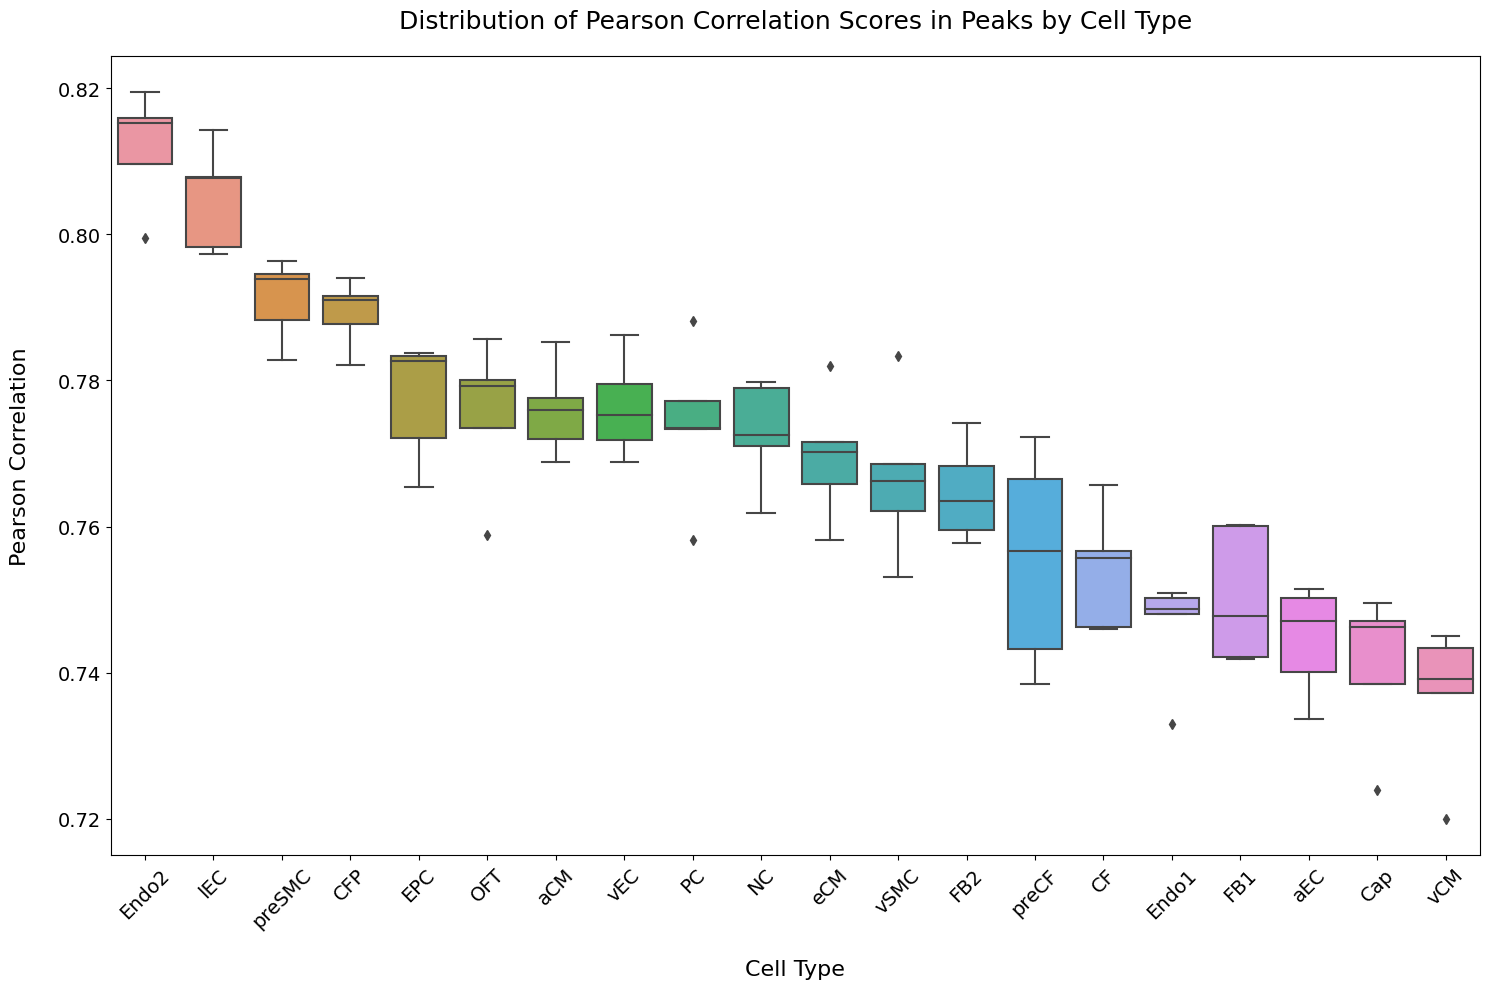

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='celltype', y='peaks_pearsonr', data=cell_type_metrics_df, order=sorted_peaks_pearson_scores_by_celltype)
plt.title('Distribution of Pearson Correlation Scores in Peaks by Cell Type', fontsize=18, pad=20)
plt.xlabel('Cell Type', fontsize=16, labelpad=20)
plt.ylabel('Pearson Correlation', fontsize=16, labelpad=20)
plt.xticks(rotation=45, fontsize=14)  # Rotate the cell type labels to make them readable
plt.yticks(fontsize=14)
# plt.ylim(0.60, 0.90)
plt.tight_layout()  # Adjust the layout

plt.show()

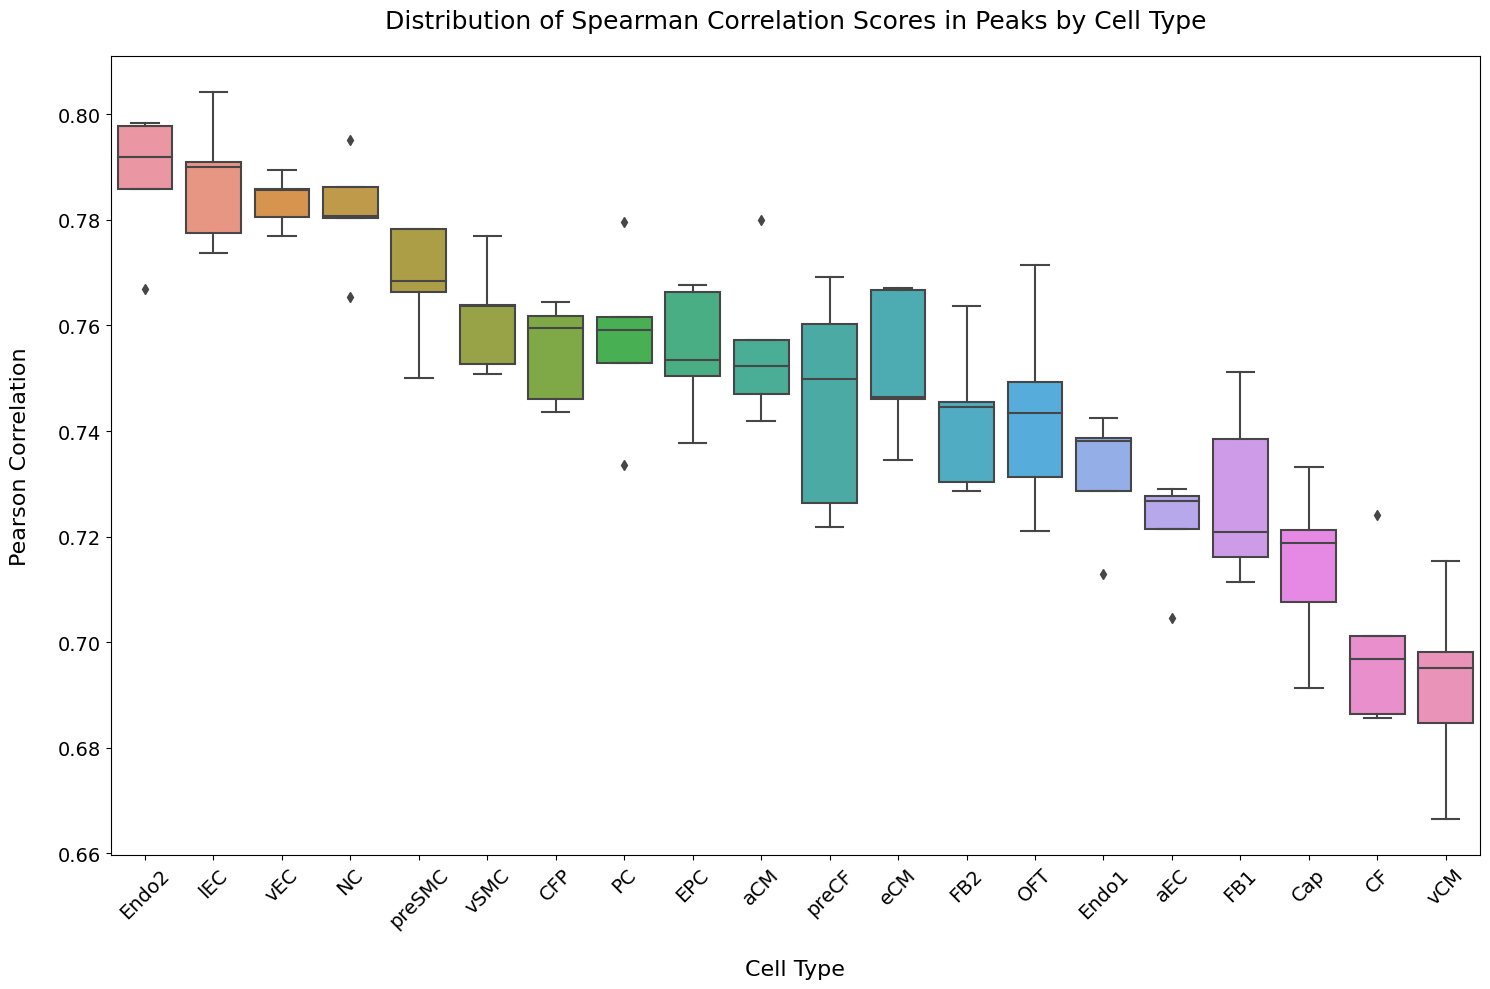

In [18]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='celltype', y='peaks_spearmanr', data=cell_type_metrics_df, order=sorted_peaks_spearman_scores_by_celltype)
plt.title('Distribution of Spearman Correlation Scores in Peaks by Cell Type', fontsize=18, pad=20)
plt.xlabel('Cell Type', fontsize=16, labelpad=20)
plt.ylabel('Pearson Correlation', fontsize=16, labelpad=20)
plt.xticks(rotation=45, fontsize=14)  # Rotate the cell type labels to make them readable
plt.yticks(fontsize=14)
# plt.ylim(0.60, 0.90)
plt.tight_layout()  # Adjust the layout

plt.show()

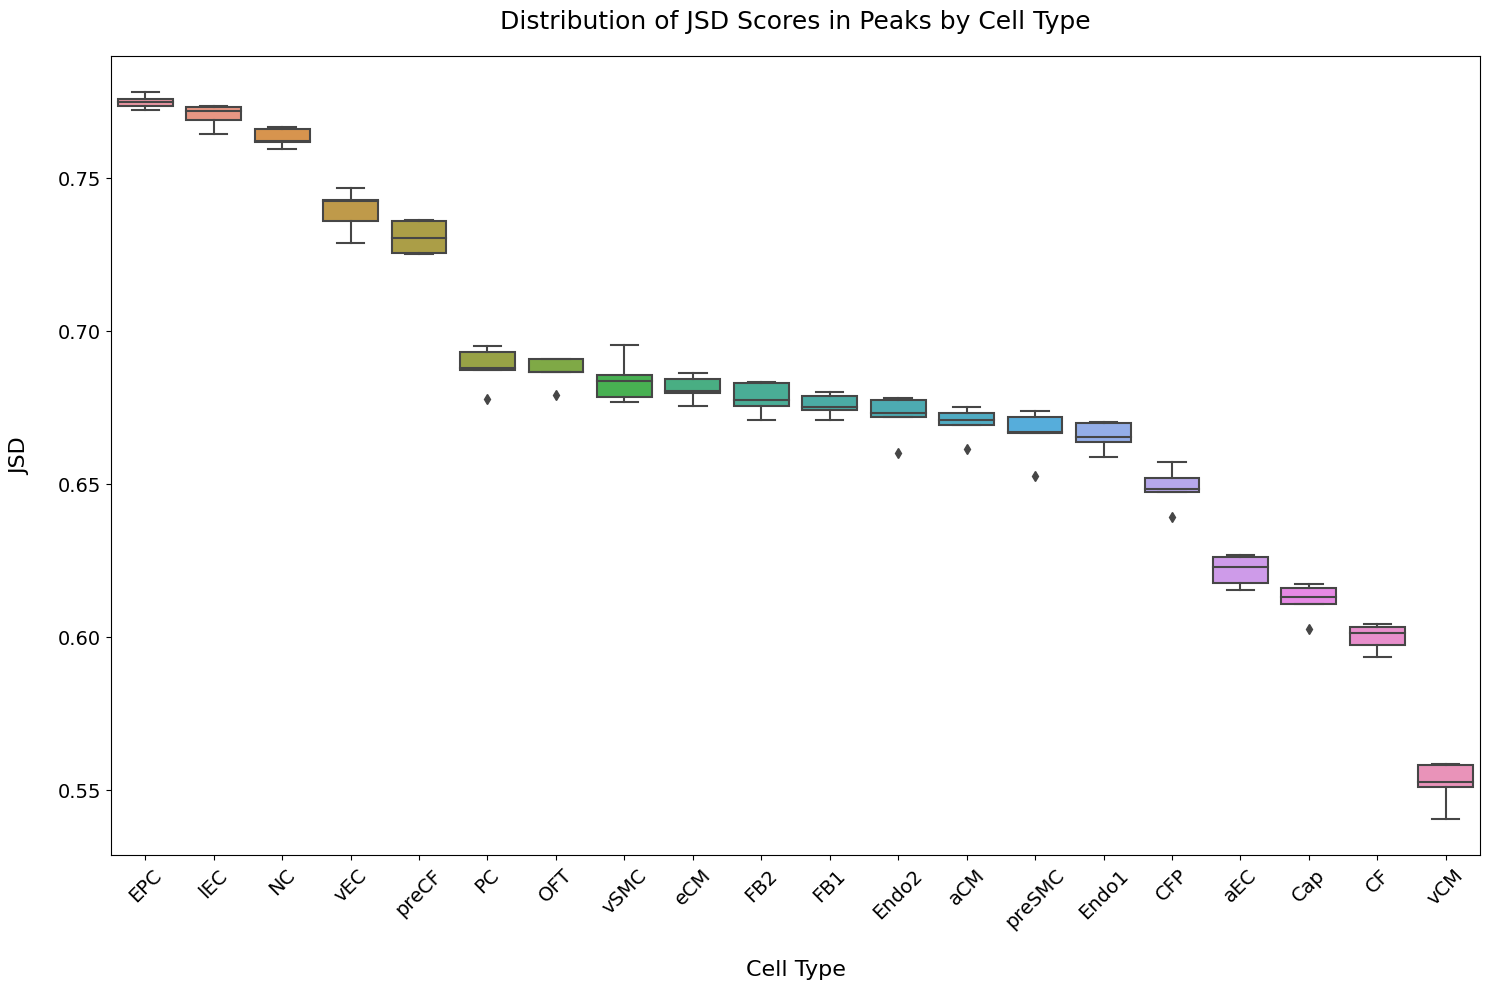

In [19]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='celltype', y='peaks_median_jsd', data=cell_type_metrics_df, order=sorted_peaks_jsd_scores_by_celltype)
plt.title('Distribution of JSD Scores in Peaks by Cell Type', fontsize=18, pad=20)
plt.xlabel('Cell Type', fontsize=16, labelpad=20)
plt.ylabel('JSD', fontsize=16, labelpad=20)
plt.xticks(rotation=45, fontsize=14)  # Rotate the cell type labels to make them readable
plt.yticks(fontsize=14)
plt.tight_layout()  # Adjust the layout

plt.show()

In [20]:
cell_type_metrics_df.to_csv(os.path.join(outs_dir, 'model_performance.tsv'),
                            index=False, sep='\t')